In [1]:
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from dechorate import constants

# Load RIRs

In [5]:
path_to_rirs_hdf = Path('../outputs/dEchorate_babble_gzip7.hdf5')
rir_dset = h5py.File(path_to_rirs_hdf, mode='r')

signals = list(rir_dset.keys())
print('Signals', signals)

rooms = list(rir_dset[signals[0]].keys())
print('Rooms', rooms)

sources = list(rir_dset[signals[0]][rooms[0]].keys())
print('Sources', sources)

print()



Signals ['babble']
Rooms ['000000', '000001', '000010', '000100', '001000', '010000', '011000', '011100', '011110', '011111', '020002']
Sources ['0', '1', '2', '3']


In [4]:
path_to_delay_note = Path('..', 'dEchorate_rir_database.csv')
rir_df = pd.read_csv(path_to_delay_note)
print(rir_df)

      Unnamed: 0 signal  room_code  src_id  mic_id      path_hdf5  delay
0              0    rir          0       1       0  /rir/000000/1   4444
1              1    rir          0       1       1  /rir/000000/1   4444
2              2    rir          0       1       2  /rir/000000/1   4444
3              3    rir          0       1       3  /rir/000000/1   4444
4              4    rir          0       1       4  /rir/000000/1   4444
...          ...    ...        ...     ...     ...            ...    ...
3064        3064    rir      20002       9      26  /rir/020002/9   4444
3065        3065    rir      20002       9      27  /rir/020002/9   4444
3066        3066    rir      20002       9      28  /rir/020002/9   4444
3067        3067    rir      20002       9      29  /rir/020002/9   4444
3068        3068    rir      20002       9      30  /rir/020002/9   4444

[3069 rows x 7 columns]


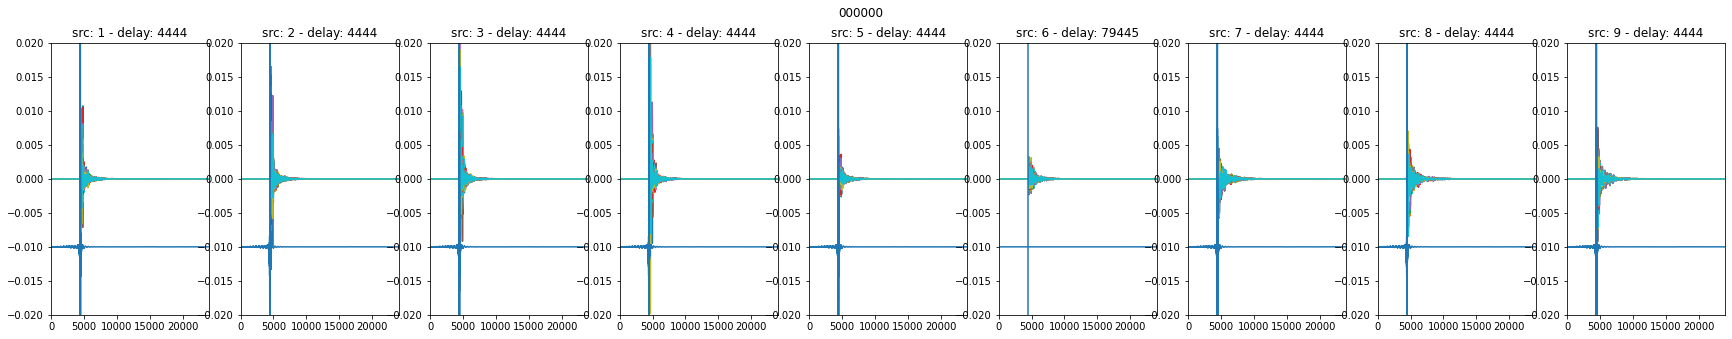

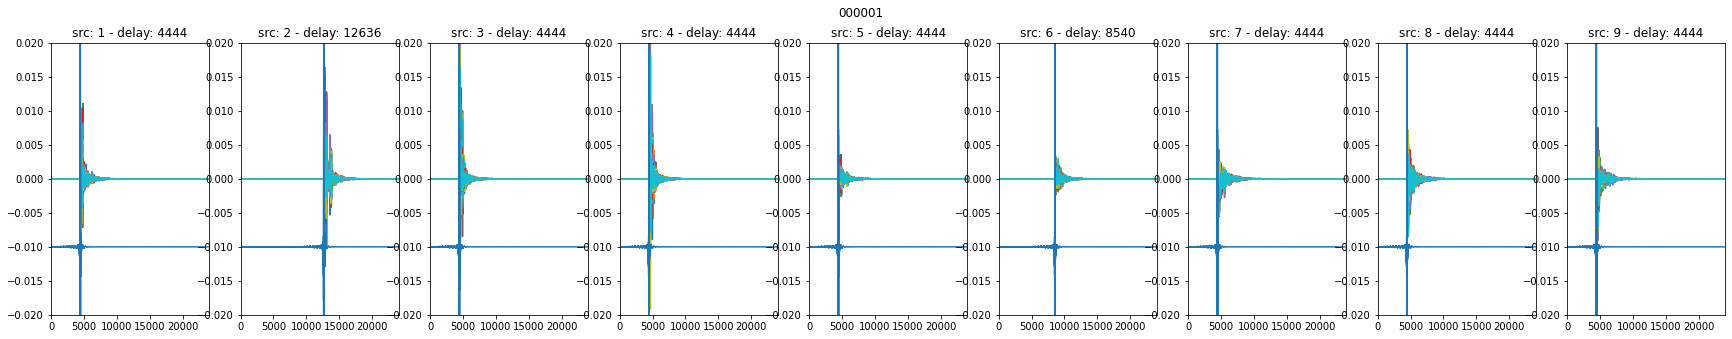

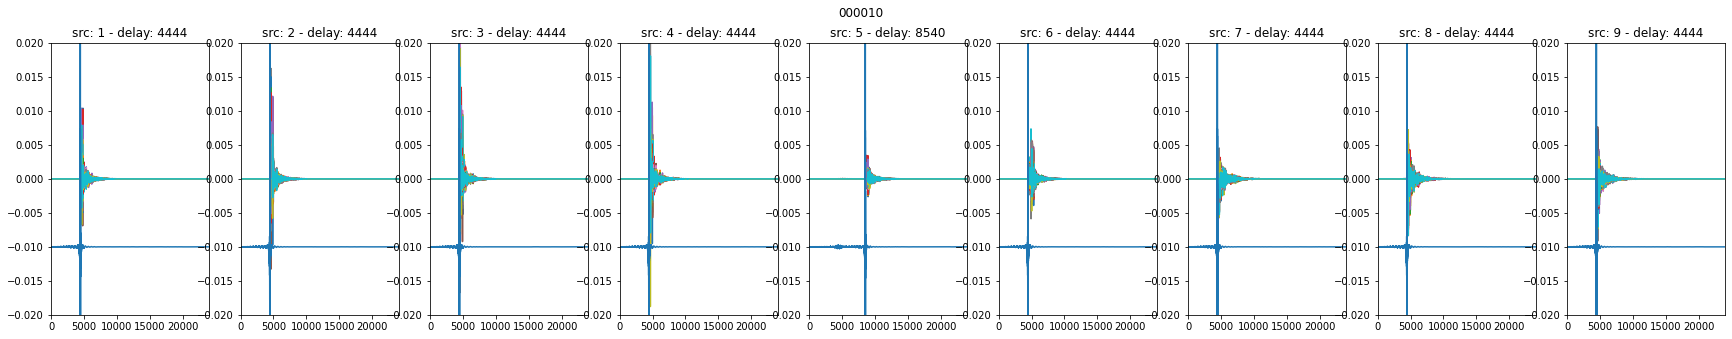

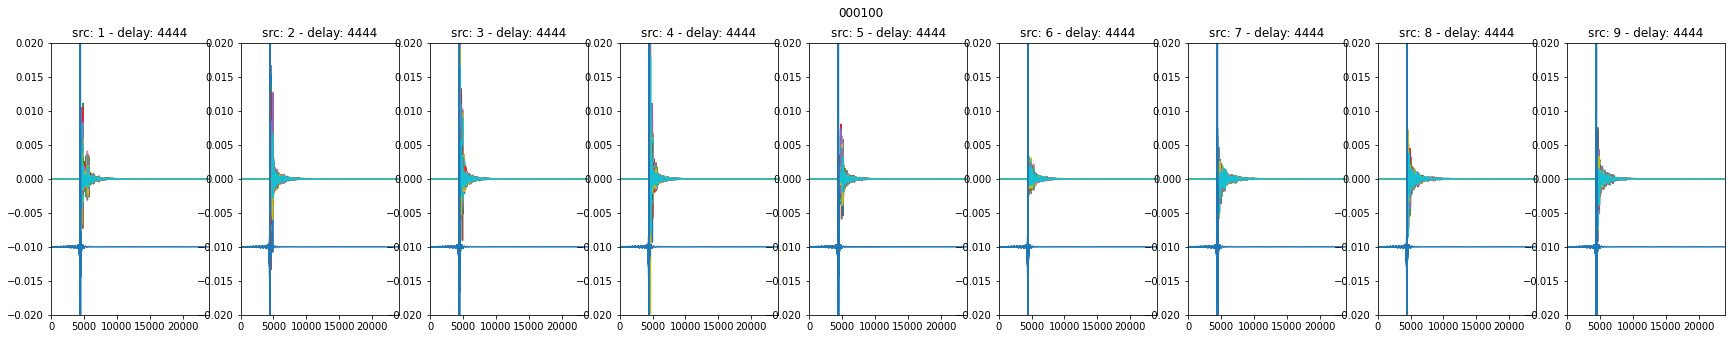

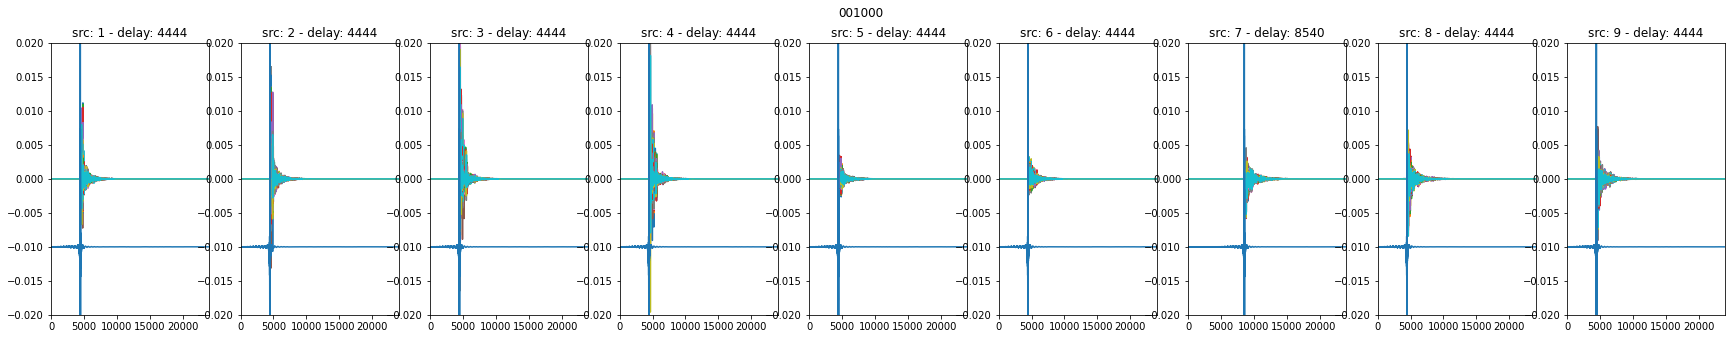

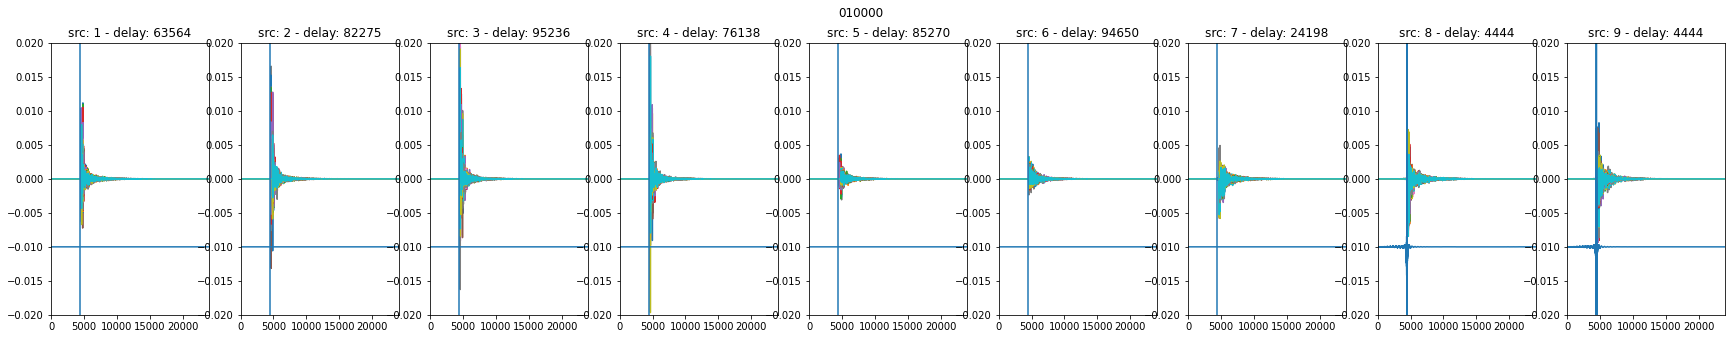

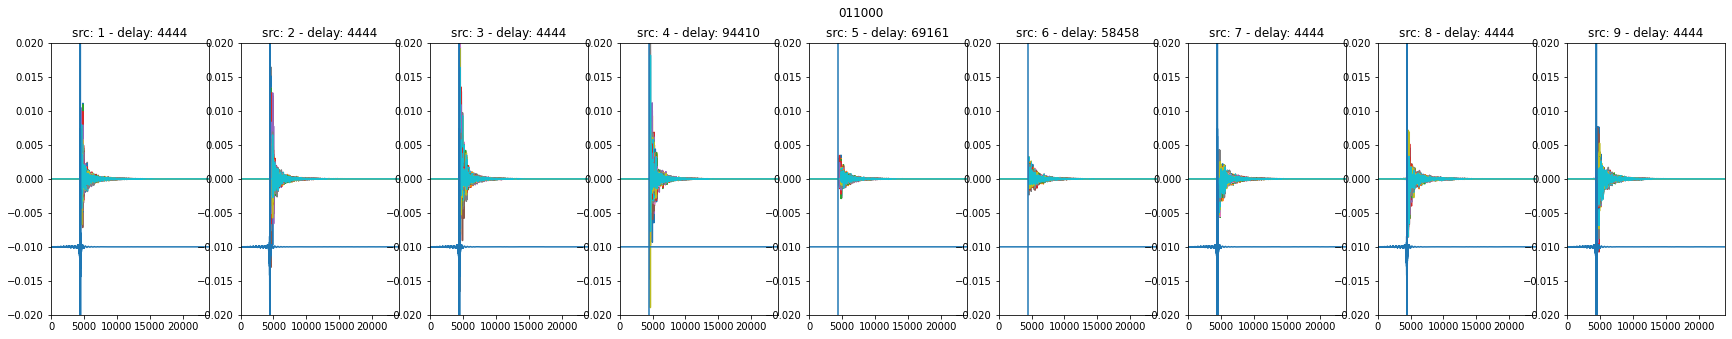

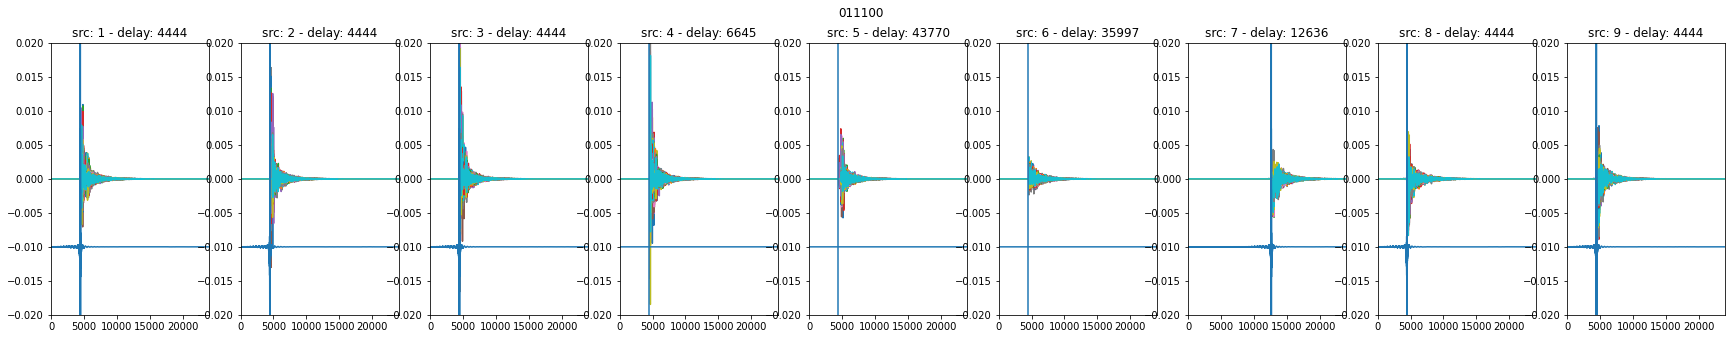

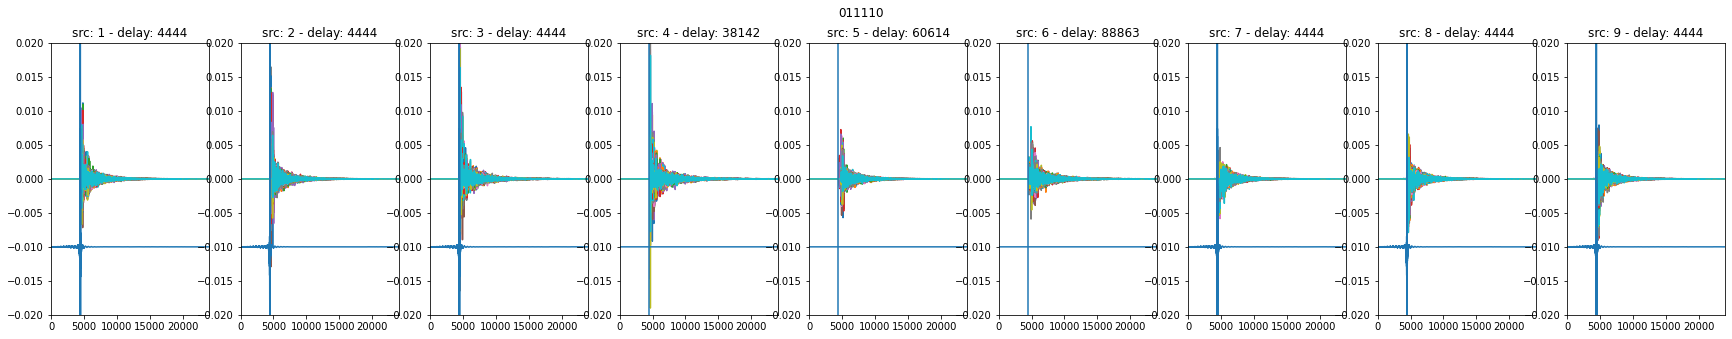

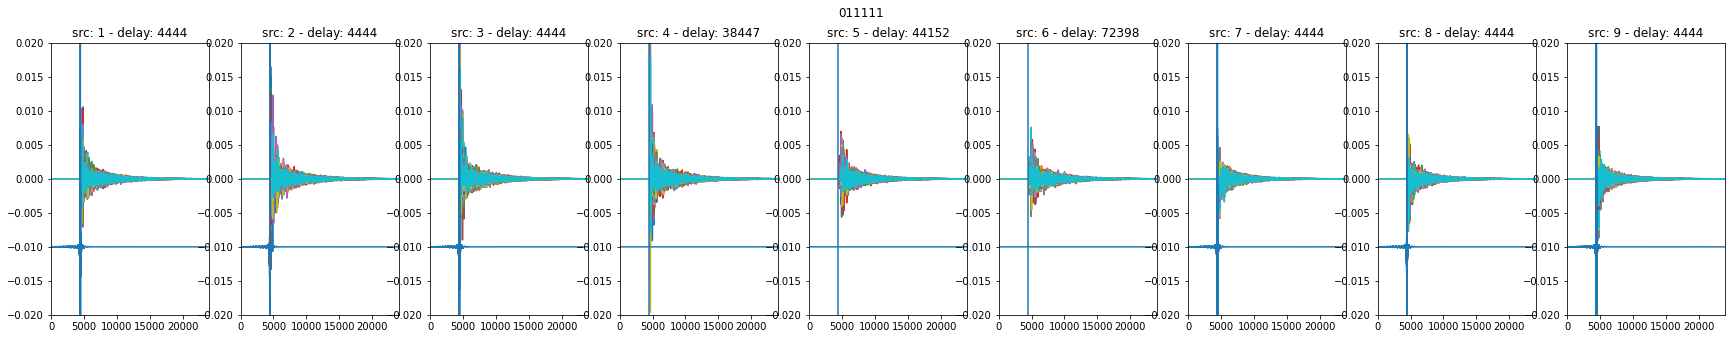

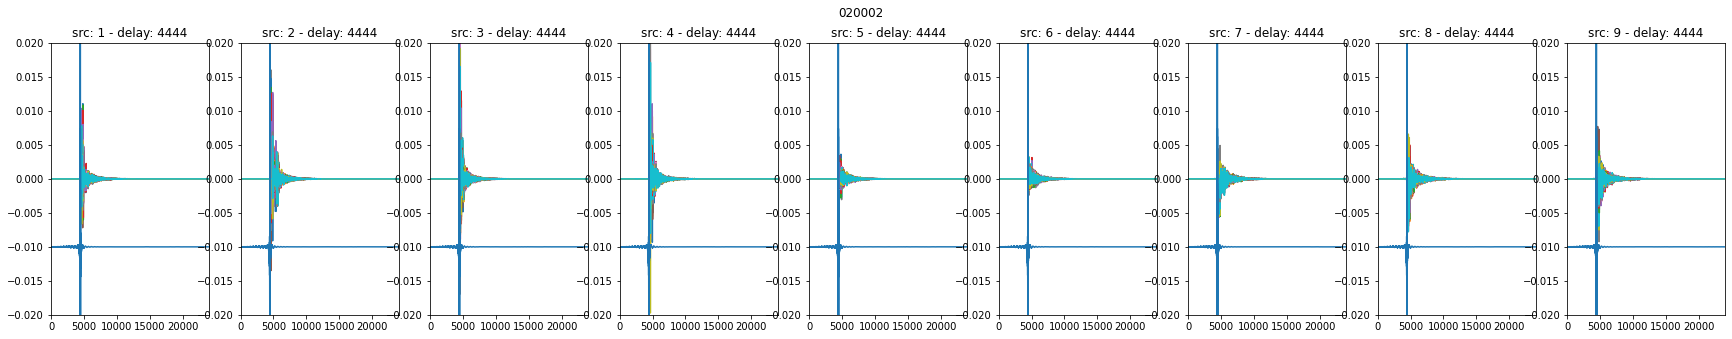

In [13]:
Fs = constants['Fs']
L = 2*Fs
offset_insights = {
    '/rir/000001/2' : 12636
,   '/rir/000001/6' :  8540
,   '/rir/000010/5' :  8540    
,   '/rir/001000/7' :  8540
,   '/rir/011100/7' : 12636
}
for room in rooms:

    srcs = list(rir_dset['rir'][room])

    fig, axarr = plt.subplots(1, len(srcs), figsize=(30,5))
    plt.suptitle(room)

    for s, src in enumerate(srcs):

        group = f'/rir/{room}/{src}'
        rirs = np.asarray(rir_dset[group])
    
        delays = pd.unique(rir_df.loc[rir_df['path_hdf5'].str.match(group)]['delay'])    
        
        if len(delays) == 1:
            d = delays[0]
            if group in list(offset_insights.keys()):
                d = offset_insights[group]
            else:
                d = constants['recording_offset']
        else:
            print(delays)
            raise ValueError('NotUniqueDelay')

        axarr[s].set_title(f'src: {src} - delay: {delays[0]}')
        axarr[s].plot(rirs[:,:-1])
        axarr[s].plot(rirs[:,-1]-0.01)
        axarr[s].axvline(x=d)
#         axarr[s].axvline(x=constants['recording_offset'])
        axarr[s].set_ylim([-0.02, 0.02])
        axarr[s].set_xlim([0, Fs//2])

    plt.show()

In [7]:
dset_chirp = h5py.File('../dEchorate_chirp.hdf5', mode='r')

Fs = constants['Fs']
L = 2*Fs
signal = 'chirp'
dset = dset_chirp

for room in rooms:

    print(room)

    srcs = list(dset[signal][room].keys())

    fig, axarr = plt.subplots(1, len(srcs), figsize=(30,5))
    
    plt.suptitle(room)
    for s, src in enumerate(srcs):

        group = f'/{signal}/{room}/{src}'
        data = np.asarray(dset[group])

        axarr[s].set_title(f'src: {src}')
        axarr[s].plot(100*data[::4,-1], alpha=0.5)
        # axarr[s].plot(data[:,:3])
        axarr[s].axvline(x=constants['recording_offset']//4)
        axarr[s].set_ylim([-0.025, 0.025])
        # axarr[s].set_xlim([0, 20*Fs])

    plt.tight_layout()
    plt.savefig(f'../figures/{signal}_{room}_{src}.png')
    plt.close()

000000
000001
000010
000100
001000
010000
011000
011100
011110
011111
020002


# Visualize RIRs

In [ ]:
L, I, J, D = rirs.shape
datasets = constants['datasets']

In [ ]:
j = 0
max_len = 8000

for i in range(I):
    delays = delay_df.loc[
        (delay_df['mic_id'] == i+1) & 
        (delay_df['src_id'] == j+1)
        ]['delay'].values
    delay = int(np.median(delays))
    print(i, j, d, delay)
    curr_rirs = rirs[delay:max_len, i, j, :]
    plt.plot(np.abs(curr_rirs))
    plt.show()

In [ ]:
plt.imshow(np.abs(curr_rirs).T, aspect='auto')

In [ ]:
h = rirs[:,0,0,5]
t = np.arange(len(h))/48000
plt.figure(figsize=(10,5))
plt.plot(t,np.abs(h))
plt.xlim([0.09, 0.40])
plt.savefig('rir.pdf')
plt.show()